<a href="https://colab.research.google.com/github/AbhilashIngale/EVA-Projects/blob/master/Session5/Session5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import basic dependancies and packages from keras

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


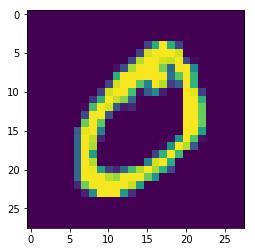

In [144]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [148]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [149]:
# Import dependancies and packages from keras 
from keras.layers.convolutional import Conv2D
from keras.layers import Activation
from keras import regularizers

model = Sequential()
 
model.add(Conv2D(16, 3, 3, input_shape=(28,28,1),kernel_regularizer=regularizers.l2(0.01))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(32, 3, 3)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(10, 1, 1)) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Conv2D(16, 3, 3))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Conv2D(16, 3, 3))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Conv2D(16, 3, 3))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Conv2D(16, 3, 3))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Conv2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-pac

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_72 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_71 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_71 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_73 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_72 (Activation)   (None, 24, 24, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [0]:
#  Import IDG and apply Normalisation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

train_iterator = datagen.flow(X_train, Y_train, batch_size=128, shuffle=False)
val_iterator = datagen.flow(X_test, Y_test, batch_size=128, shuffle=False)

In [0]:
# Insert checkpoints to sace model 
from keras.callbacks import *
filepath='sample_data/session5_best_model.hdf5'

checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max',  period=1)


In [152]:
# Define the LR cheduler and compile the model
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# Load a previously saved model
# model = load_model('content/sample_data/session5_best_model.hdf5')

# Fit the datagen to the model
model.fit_generator(train_iterator, steps_per_epoch=512, verbose=1,nb_epoch=40,validation_data=val_iterator,validation_steps = 64, callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)])
#model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=512, verbose=1, validation_data=<keras_pre..., validation_steps=64, callbacks=[<keras.ca..., epochs=40)`
  if __name__ == '__main__':


Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
512/512 [==============================] - 19s 37ms/step - loss: 0.5215 - acc: 0.8582 - val_loss: 0.2196 - val_acc: 0.9602

Epoch 00001: val_acc improved from -inf to 0.96021, saving model to sample_data/session5_best_model.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
512/512 [==============================] - 9s 18ms/step - loss: 0.2454 - acc: 0.9285 - val_loss: 0.1484 - val_acc: 0.9649

Epoch 00002: val_acc improved from 0.96021 to 0.96485, saving model to sample_data/session5_best_model.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
512/512 [==============================] - 9s 18ms/step - loss: 0.1919 - acc: 0.9414 - val_loss: 0.0605 - val_acc: 0.9863

Epoch 00003: val_acc improved from 0.96485 to 0.98626, saving model to sample_data/session5_best_model.hdf5
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate 

In [153]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.024551696889661252, 0.9938]
